<a href="https://colab.research.google.com/github/krisha218/ML-Bootcamp/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 60496376.46it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1840436.56it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 14918667.39it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 5840137.57it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [10]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [11]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [12]:
train_data.targets.size()

torch.Size([60000])

In [13]:
train_data.targets


tensor([5, 0, 4,  ..., 5, 6, 8])

In [17]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data, batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
    'test': DataLoader(test_data,
                       batch_size = 100,
                       shuffle = True,
                       num_workers = 1)
}

In [18]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7b79e3512e90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7b79e3512140>}

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2))
        # Added kernel_size=2 to the second max_pool2d call
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), kernel_size=2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2))  # kernel_size provided for the first max_pool2d
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), kernel_size=2))  # kernel_size provided for the second max_pool2d
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

import torch
import torch.optim as optim
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} '
                  f'[{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
                  f'({100. * batch_idx / len(loaders["train"]):.0f}%)] '
                  f'Loss: {loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
          f'({100. * correct / len(loaders["test"].dataset):.0f}%)')




In [42]:
for epoch in range(1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)] Loss: 2.303927
Train Epoch: 1 [2000/60000 (3%)] Loss: 2.250831
Train Epoch: 1 [4000/60000 (7%)] Loss: 1.755435
Train Epoch: 1 [6000/60000 (10%)] Loss: 1.378603
Train Epoch: 1 [8000/60000 (13%)] Loss: 1.027004
Train Epoch: 1 [10000/60000 (17%)] Loss: 0.955070
Train Epoch: 1 [12000/60000 (20%)] Loss: 0.703615
Train Epoch: 1 [14000/60000 (23%)] Loss: 0.879960
Train Epoch: 1 [16000/60000 (27%)] Loss: 0.742081
Train Epoch: 1 [18000/60000 (30%)] Loss: 0.509349
Train Epoch: 1 [20000/60000 (33%)] Loss: 0.662479
Train Epoch: 1 [22000/60000 (37%)] Loss: 0.555038
Train Epoch: 1 [24000/60000 (40%)] Loss: 0.459816
Train Epoch: 1 [26000/60000 (43%)] Loss: 0.722675
Train Epoch: 1 [28000/60000 (47%)] Loss: 0.445579
Train Epoch: 1 [30000/60000 (50%)] Loss: 0.423318
Train Epoch: 1 [32000/60000 (53%)] Loss: 0.609819
Train Epoch: 1 [34000/60000 (57%)] Loss: 0.397368
Train Epoch: 1 [36000/60000 (60%)] Loss: 0.775317
Train Epoch: 1 [38000/60000 (63%)] Loss: 0.426463
Train Epoch

Prediction: tensor([[7]])


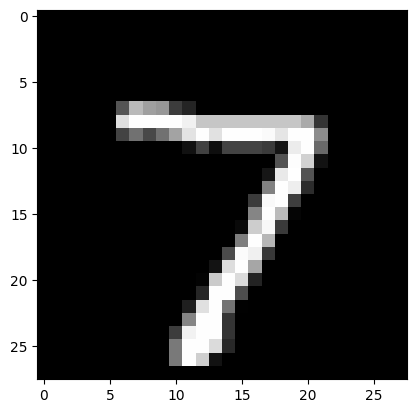

In [46]:
import matplotlib.pyplot as plt

model.eval()

data,target = test_data[0]

data  = data.unsqueeze(0)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True)

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()
